In [7]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from collections import Counter, OrderedDict


# 気候データのダウンロード
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

pop_count_data = {}
pop_density_data={}

for year in years:
    
    for model in models:
        pop_count_data[(year, model)] = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
        pop_density_data[(year, model)] = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
        #12か月気候データをもってくる
        if model=='CSIRO':
            # データの読み込み
            tas_data =nc.Dataset(f'/work/a06/tsuda/m1/CSIRO/annual_mean_tas_Amon_CSIRO-Mk3L-1-2_{year}.nc')
            #numpy配列に変換
            tas_data = np.array(tas_data.variables['annual_mean_tas'][:])
            tas_data = np.roll(tas_data, shift=180, axis=2)
            tas_data = np.flip(tas_data, axis=1)
            pr_data = nc.Dataset(f'/work/a06/tsuda/m1/CSIRO/annual_mean_pr_Amon_CSIRO-Mk3L-1-2_{year}.nc')
            #numpy配列に変換
            pr_data = np.array(pr_data.variables['annual_mean_pr'][:])
            pr_data = np.roll(pr_data, shift=180, axis=2)
            pr_data = np.flip(pr_data, axis=1)
        
        if model=='IPSL':
            # データの読み込み
            tas_data =nc.Dataset(f'/work/a06/tsuda/m1/IPSL/annual_mean_tas_IPSL_{year}.nc')
            #numpy配列に変換
            tas_data = np.array(tas_data.variables['annual_mean_tas'][:])
            tas_data = np.roll(tas_data, shift=180, axis=2)
            tas_data = np.flip(tas_data, axis=1)
            pr_data = nc.Dataset(f'/work/a06/tsuda/m1/IPSL/annual_mean_pr_IPSL_{year}.nc')
            #numpy配列に変換
            pr_data = np.array(pr_data.variables['annual_mean_pr'][:])
            pr_data = np.roll(pr_data, shift=180, axis=2)
            pr_data = np.flip(pr_data, axis=1)
        
        if model=='HadCM3':
            # データの読み込み
            tas_data =nc.Dataset(f'/work/a06/tsuda/m1/HadCM3/annual_mean_tas_HadCM3_{year}.nc')
            #numpy配列に変換
            tas_data = np.array(tas_data.variables['annual_mean_tas'][:])
            tas_data = np.roll(tas_data, shift=180, axis=2)
            tas_data = np.flip(tas_data, axis=1)
            pr_data = nc.Dataset(f'/work/a06/tsuda/m1/HadCM3/annual_mean_pr_HadCM3_{year}.nc')
            #numpy配列に変換
            pr_data = np.array(pr_data.variables['annual_mean_pr'][:])
            pr_data = np.roll(pr_data, shift=180, axis=2)
            pr_data = np.flip(pr_data, axis=1)

        if model=='MPI':
            tas_data =nc.Dataset(f'/work/a06/tsuda/m1/MPI/annual_mean_tas_MPI_{year}.nc')
            #numpy配列に変換    
            tas_data = np.array(tas_data.variables['annual_mean_tas'][:])
            tas_data = np.roll(tas_data, shift=180, axis=2)
            tas_data = np.flip(tas_data, axis=1)
            pr_data = nc.Dataset(f'/work/a06/tsuda/m1/MPI/annual_mean_pr_MPI_{year}.nc')
            #numpy配列に変換
            pr_data = np.array(pr_data.variables['annual_mean_pr'][:])
            pr_data = np.roll(pr_data, shift=180, axis=2)
            pr_data = np.flip(pr_data, axis=1)


        if model=='GISS':
            # データの読み込み
            tas_data = np.load(f'/work/a06/tsuda/m1/GISS_mean_tas_{year}.npy')
            #numpy配列に変換
            tas_data = np.array(tas_data)
            tas_data = np.roll(tas_data, shift=180, axis=2)
            tas_data = np.flip(tas_data, axis=1)
            pr_data = np.load(f'/work/a06/tsuda/m1/GISS_mean_pr_{year}.npy')
            #numpy配列に変換
            pr_data = np.array(pr_data)
            pr_data = np.roll(pr_data, shift=180, axis=2)
            pr_data = np.flip(pr_data, axis=1)





# ここに気候分類の計算ロジックを挿入（上記のコードを参照）
        MAT = np.mean(tas_data, axis=0)
        MAP = np.sum(pr_data, axis=0)

        #計算結果を保存
        np.save(f'/work/a06/tsuda/m1/MAT_{model}_{year}.npy', MAT)
        np.save(f'/work/a06/tsuda/m1/MAP_{model}_{year}.npy', MAP)
        print(f'{model}_{year} is done')
        



GISS_900 is done
IPSL_900 is done
HadCM3_900 is done
MPI_900 is done
CSIRO_900 is done
GISS_1400 is done
IPSL_1400 is done
HadCM3_1400 is done
MPI_1400 is done
CSIRO_1400 is done
GISS_1700 is done
IPSL_1700 is done
HadCM3_1700 is done
MPI_1700 is done
CSIRO_1700 is done
GISS_1850 is done
IPSL_1850 is done
HadCM3_1850 is done
MPI_1850 is done
CSIRO_1850 is done
GISS_1950 is done
IPSL_1950 is done
HadCM3_1950 is done
MPI_1950 is done
CSIRO_1950 is done
GISS_2000 is done
IPSL_2000 is done
HadCM3_2000 is done
MPI_2000 is done
CSIRO_2000 is done


In [12]:
years = [900, 1400, 1700, 1850, 1950, 2000]

pop_count_data = {}
pop_density_data={}

for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    
    tas_data = np.load(f'/work/a06/tsuda/m1/mean_tas_{year}.npy')
    #numpy配列に変換
    tas_data = np.array(tas_data)
    tas_data = np.roll(tas_data, shift=180, axis=2)
    tas_data = np.flip(tas_data, axis=1)

    MAT = np.mean(tas_data, axis=0)

    pr_data = np.load(f'/work/a06/tsuda/m1/mean_pr_{year}.npy')
    #numpy配列に変換
    pr_data = np.array(pr_data)
    pr_data = np.roll(pr_data, shift=180, axis=2)
    pr_data = np.flip(pr_data, axis=1)

    MAP = np.sum(pr_data, axis=0)
   
    #保存
    np.save(f'/work/a06/tsuda/m1/MAT_{year}.npy', MAT)
    np.save(f'/work/a06/tsuda/m1/MAP_{year}.npy', MAP)
    
    


3890.867 6.777549
3949.2944 7.127682
3758.0796 6.941288
3834.0068 7.539715
3817.089 7.2532735
3869.7678 8.260388


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from collections import Counter, OrderedDict

# 気候データのダウンロード
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

pop_count_data = {}
pop_density_data={}
class_labels={}


for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    #人口密度のクラス分けのラベルをダウンロード
    class_labels[(year)] = np.load(f'class_labels_20_{year}.npy')
    print(class_labels[(year)])
    for model in models:
        MAP=np.load(f'/work/a06/tsuda/m1/MAP_{model}_{year}.npy')
        MAT=np.load(f'/work/a06/tsuda/m1/MAT_{model}_{year}.npy')
        MAT_new = np.zeros((2160, 4320))
        MAP_new = np.zeros((2160, 4320))
        for i in range(180):
            for j in range(360):
                MAT_new[12*i:12*(i+1), 12*j:12*(j+1)] = MAT[i, j]
                MAP_new[12*i:12*(i+1), 12*j:12*(j+1)] = MAP[i, j]
        #保存
        np.save(f'/work/a06/tsuda/m1/MAT2160×4320_{model}_{year}.npy', MAT_new)
        np.save(f'/work/a06/tsuda/m1/MAP2160×4320_{model}_{year}.npy', MAP_new)

        #人口密度クラスごとにＭＡＴとＭＡＰの箱ひげ図を描画(5%、95%区間を除く）人口で重みづけ
    

[   0.            4.80100108   13.95901111   28.06889405   63.6682296
 1553.57518695]


[   0.            6.34750601   18.68974499   34.78480058   69.25637764
 2833.23239943]
[   0.           10.75857737   31.25437659   53.53823054  106.27015691
 7980.2712584 ]
[    0.            27.24634856    70.85335573   143.70255582
   260.1706254  18646.2107287 ]
[    0.            50.75767045   142.70295928   311.23853175
   740.6434275  49693.1646813 ]
[    0.           139.67414863   408.70901976   910.49042439
  2614.94422189 55683.9844728 ]


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from collections import Counter, OrderedDict

# 気候データのダウンロード
years = [900, 1400, 1700, 1850, 1950, 2000]


pop_count_data = {}
pop_density_data={}
class_labels={}


for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    #人口密度のクラス分けのラベルをダウンロード
    class_labels[(year)] = np.load(f'class_labels_20_{year}.npy')
    print(class_labels[(year)])
   
    MAT=np.load(f'/work/a06/tsuda/m1/MAT_{year}.npy')
    MAP=np.load(f'/work/a06/tsuda/m1/MAP_{year}.npy')
    print(MAP.shape)
    
    MAT_new = np.zeros((2160, 4320))
    MAP_new = np.zeros((2160, 4320))
    for i in range(180):
        for j in range(360):
            MAT_new[12*i:12*(i+1), 12*j:12*(j+1)] = MAT[i, j]
            MAP_new[12*i:12*(i+1), 12*j:12*(j+1)] = MAP[i, j]
    #保存
    np.save(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy', MAT_new)
    np.save(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy', MAP_new)

    print(np.max(MAP_new))

        #人口密度クラスごとにＭＡＴとＭＡＰの箱ひげ図を描画(5%、95%区間を除く）人口で重みづけ


[   0.            4.80100108   13.95901111   28.06889405   63.6682296
 1553.57518695]
(180, 360)
3890.866943359375
[   0.            6.34750601   18.68974499   34.78480058   69.25637764
 2833.23239943]
(180, 360)
3949.29443359375
[   0.           10.75857737   31.25437659   53.53823054  106.27015691
 7980.2712584 ]
(180, 360)
3758.07958984375
[    0.            27.24634856    70.85335573   143.70255582
   260.1706254  18646.2107287 ]
(180, 360)
3834.0068359375
[    0.            50.75767045   142.70295928   311.23853175
   740.6434275  49693.1646813 ]
(180, 360)
3817.089111328125
[    0.           139.67414863   408.70901976   910.49042439
  2614.94422189 55683.9844728 ]
(180, 360)
3869.767822265625


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

# 各年ごとのデータを格納する辞書
pop_count_data = {}
pop_density_data = {}
class_labels = {}

# 各年ごとにデータを読み込む
for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    class_labels[year] = np.load(f'class_labels_20_{year}.npy')

# 箱ひげ図を描画するためのデータを格納するリスト
boxplot_data_MAT = {year: [[] for _ in range(5)] for year in years}
boxplot_data_MAP = {year: [[] for _ in range(5)] for year in years}

for year in years:
    for model in models:
        total_population = np.zeros(5)
        MAT = np.load(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy')
        MAP = np.load(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy')

        class_data_MAT = [[] for _ in range(5)]
        class_data_MAP = [[] for _ in range(5)]

        for i in range(5):
            lower_bound = class_labels[year][i]
            upper_bound = class_labels[year][i + 1]
            indices = np.where((lower_bound <= pop_density_data[year]) & (pop_density_data[year] < upper_bound))
            MAT_value = MAT[indices]
            MAP_value = MAP[indices]
            grid_counts=len(indices[0])
            total_population[i] = np.round(np.sum(pop_count_data[year][indices]))
            repeated_data_MAT = np.repeat(MAT_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            repeated_data_MAP = np.repeat(MAP_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            class_data_MAT[i] = repeated_data_MAT
            class_data_MAP[i] = repeated_data_MAP

            boxplot_data_MAT[year][i].extend(repeated_data_MAT)
            boxplot_data_MAP[year][i].extend(repeated_data_MAP)

# 年代ごとにMATの箱ひげ図を描画
for year in years:
    plt.figure(figsize=(12, 6))
    plt.boxplot(boxplot_data_MAT[year], labels=[f'Class {i+1}' for i in range(5)], showfliers=False)
    plt.title(f'MAT Boxplot for Year {year}')
    plt.xlabel('Population Density Class')
    plt.ylabel('MAT')
    plt.tight_layout()
    plt.show()

# 年代ごとにMAPの箱ひげ図を描画
for year in years:
    plt.figure(figsize=(12, 6))
    plt.boxplot(boxplot_data_MAP[year], labels=[f'Class {i+1}' for i in range(5)], showfliers=False)
    plt.title(f'MAP Boxplot for Year {year}')
    plt.xlabel('Population Density Class')
    plt.ylabel('MAP')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

# 各年ごとのデータを格納する辞書
pop_count_data = {}
pop_density_data = {}
class_labels = {}

# 各年ごとにデータを読み込む
for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    class_labels[year] = np.load(f'class_labels_20_{year}.npy')

# 箱ひげ図を描画するためのデータを格納するリスト
boxplot_data_MAT = {year: [[] for _ in range(5)] for year in years}
boxplot_data_MAP = {year: [[] for _ in range(5)] for year in years}
grid_counts = {year: [0 for _ in range(5)] for year in years}
std_devs_MAT = {year: [0 for _ in range(5)] for year in years}
std_devs_MAP = {year: [0 for _ in range(5)] for year in years}

for year in years:
    for model in models:
        total_population = np.zeros(5)
        MAT = np.load(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy')
        MAP = np.load(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy')

        class_data_MAT = [[] for _ in range(5)]
        class_data_MAP = [[] for _ in range(5)]

        for i in range(5):
            lower_bound = class_labels[year][i]
            upper_bound = class_labels[year][i + 1]
            indices = np.where((lower_bound <= pop_density_data[year]) & (pop_density_data[year] < upper_bound))
            MAT_value = MAT[indices]
            MAP_value = MAP[indices]
            grid_counts[year][i] = len(indices[0])
            total_population[i] = np.round(np.sum(pop_count_data[year][indices]))
            repeated_data_MAT = np.repeat(MAT_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            repeated_data_MAP = np.repeat(MAP_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            class_data_MAT[i] = repeated_data_MAT
            class_data_MAP[i] = repeated_data_MAP

            boxplot_data_MAT[year][i].extend(repeated_data_MAT)
            boxplot_data_MAP[year][i].extend(repeated_data_MAP)
            std_devs_MAT[year][i] = np.std(repeated_data_MAT)
            std_devs_MAP[year][i] = np.std(repeated_data_MAP)

# 年代ごとにMATの箱ひげ図を描画
for year in years:
    plt.figure(figsize=(7, 5))
    plt.boxplot(boxplot_data_MAT[year], labels=[f'Class {i+1}\nGrid: {grid_counts[year][i]}\nStd Dev: {std_devs_MAT[year][i]:.2f}' for i in range(5)], showfliers=False)
    plt.title(f'MAT Boxplot for Year {year}')
    plt.xlabel('Population Density Class')
    plt.ylabel('MAT[℃]')
    plt.tight_layout()
    plt.show()

# 年代ごとにMAPの箱ひげ図を描画
for year in years:
    plt.figure(figsize=(7, 5))
    plt.boxplot(boxplot_data_MAP[year], labels=[f'Class {i+1}\nGrid: {grid_counts[year][i]}\nSD: {std_devs_MAP[year][i]:.2f}' for i in range(5)], showfliers=False)
    plt.title(f'MAP Boxplot for Year {year}')
    plt.xlabel('Population Density Class')
    plt.ylabel('MAP[mm]')
    plt.tight_layout()
    plt.show()

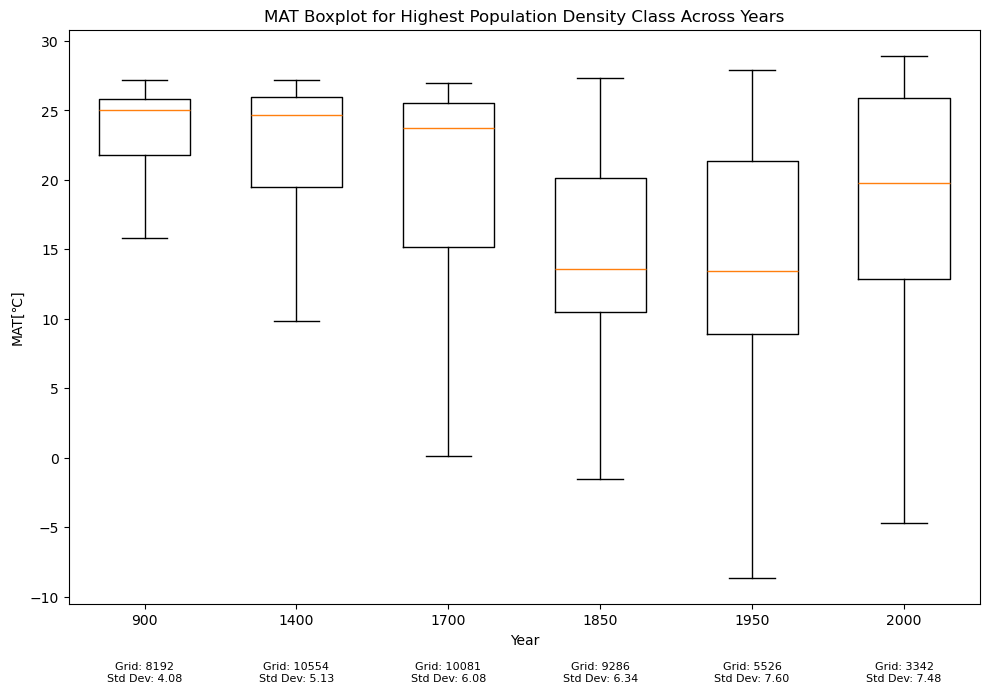

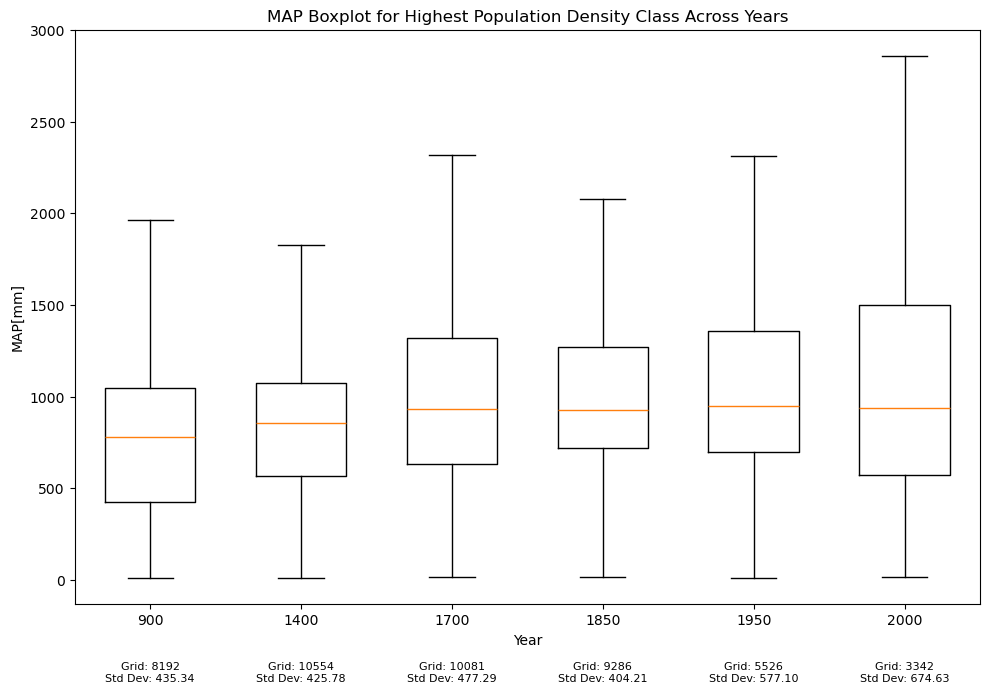

In [8]:
import matplotlib.pyplot as plt

# 各年代の最高人口密度クラスのMATを一枚のグラフにまとめる
plt.figure(figsize=(10, 7))
positions = range(len(years))
for i, year in enumerate(years):
    plt.boxplot(boxplot_data_MAT[year][4], positions=[i], widths=0.6, showfliers=False)
plt.title('MAT Boxplot for Highest Population Density Class Across Years')
plt.xlabel('Year')
plt.ylabel('MAT[℃]')
plt.xticks(ticks=positions, labels=[str(year) for year in years])

# グラフの外側にグリッドの数と標準偏差を描画
for i, year in enumerate(years):
    plt.text(i, plt.ylim()[0] - (plt.ylim()[1] - plt.ylim()[0]) * 0.1, 
             f'Grid: {grid_counts[year][4]}\nStd Dev: {std_devs_MAT[year][4]:.2f}', 
             ha='center', va='top', fontsize=8)

plt.tight_layout()
plt.show()

# 各年代の最高人口密度クラスのMAPを一枚のグラフにまとめる
plt.figure(figsize=(10, 7))
for i, year in enumerate(years):
    plt.boxplot(boxplot_data_MAP[year][4], positions=[i], widths=0.6, showfliers=False)
plt.title('MAP Boxplot for Highest Population Density Class Across Years')
plt.xlabel('Year')
plt.ylabel('MAP[mm]')
plt.xticks(ticks=positions, labels=[str(year) for year in years])

# グラフの外側にグリッドの数と標準偏差を描画
for i, year in enumerate(years):
    plt.text(i, plt.ylim()[0] - (plt.ylim()[1] - plt.ylim()[0]) * 0.1, 
             f'Grid: {grid_counts[year][4]}\nStd Dev: {std_devs_MAP[year][4]:.2f}', 
             ha='center', va='top', fontsize=8)

plt.tight_layout()
plt.show()